# PCA Reduction 

Practice using PCA reduction to reduce the size and quality of the picture by leaving only the information that is necessary. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

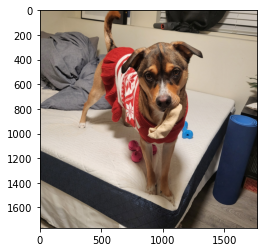

In [2]:
img = cv2.cvtColor(cv2.imread('yulmu.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()


In [3]:
img.shape # each cell has 1766 dimensions

(1766, 1766, 3)

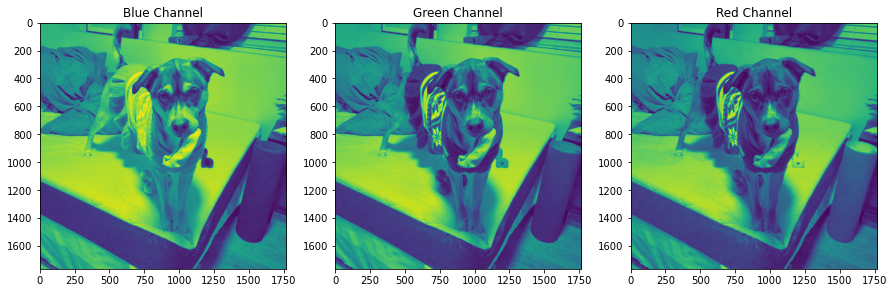

In [4]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [16]:
green_temp_df = pd.DataFrame(data = green)
green_temp_df

,0,1,2,3,4,5,6,7,8,9,...,1756,1757,1758,1759,1760,1761,1762,1763,1764,1765
0,147,147,147,147,147,148,148,146,149,147,...,192,192,190,190,191,192,192,192,192,191
1,146,146,146,146,146,147,148,147,149,148,...,192,192,192,192,192,192,191,192,192,192
2,147,147,147,147,147,148,148,147,148,148,...,192,192,192,191,191,191,191,191,192,191
3,147,147,147,147,147,147,148,147,147,147,...,192,191,190,190,191,191,192,192,192,191
4,148,148,148,148,148,148,148,148,147,148,...,191,191,191,191,192,192,192,192,192,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1761,111,98,91,104,108,122,120,118,120,128,...,108,111,109,106,102,107,116,122,119,115
1762,114,111,95,100,100,106,108,123,126,132,...,98,105,112,109,103,102,101,105,111,118
1763,124,119,100,96,99,103,105,115,120,129,...,105,100,102,100,105,109,101,101,106,111
1764,136,103,97,99,112,116,115,122,117,120,...,97,99,97,95,102,108,104,106,103,100


In [6]:
# standardizing
df_blue = blue/255
df_green = green/255
df_red = red/255

In [7]:
# PCA considering 100 dimensions 
pca_b = PCA(n_components=100)
pca_b.fit(df_blue) 
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=100)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=100)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [8]:
print(trans_pca_b.shape) # (1766, 1766) -> (1766, 100)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(1766, 100)
(1766, 100)
(1766, 100)


In [9]:
# variance ratio of 50 componenets (most dominated 50 eigenvalues)
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.9883923077160869
Green Channel: 0.9872294077738499
Red Channel  : 0.985474778316537


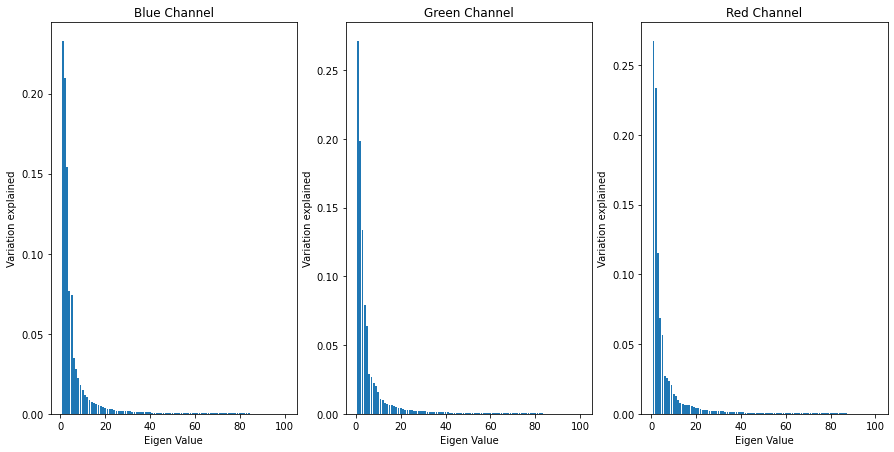

In [11]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,101)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,101)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,101)),pca_r.explained_variance_ratio_)
plt.show()

In [12]:
# inverse transform to visualize reduced img
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(1766, 1766) (1766, 1766) (1766, 1766)


In [13]:
# merge reduced BGR channels
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(1766, 1766, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


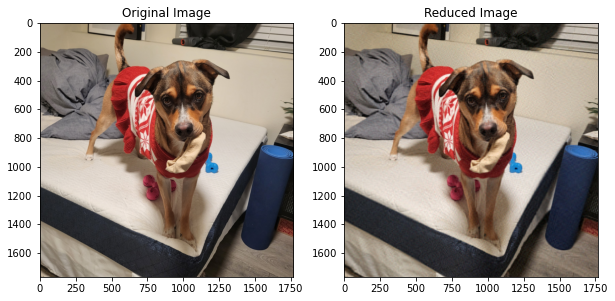

In [14]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

In [15]:
cv2.imwrite('yulmu_reduced.jpg', img_reduced)
# image file size reduced from 1.06MB to 66.7KB

True